# Decomposition of amino acids data using gradient descent

In [2]:
import numpy as np
from scipy import sparse
import matplotlib.pylab as plt
from scipy.io import loadmat
%matplotlib inline 

In [5]:
# Load amino
amino=loadmat('datasets/amino.mat');
X=amino['X']
sz=tuple([int(n) for n in amino['DimX'][0]])

In [6]:
# Check the dimensions
X.shape

(5, 201, 61)

In [7]:
# Vectorize the data and get the indices
N=np.prod(sz)
yvec=X.ravel(); yvec=yvec/yvec.std()
I,J,K=np.unravel_index(range(N),sz)

In [8]:
# Prepare index matrices
indU = sparse.coo_matrix((np.ones(N),(I,range(N))),shape=(sz[0],N))
indV = sparse.coo_matrix((np.ones(N),(J,range(N))),shape=(sz[1],N))
indW = sparse.coo_matrix((np.ones(N),(K,range(N))),shape=(sz[2],N))

In [9]:
# Initialize decomposition
rr=3
U=np.random.randn(sz[0],rr)
V=np.random.randn(sz[1],rr)
W=np.random.randn(sz[2],rr)

In [10]:
# Gradient descent
N=np.prod(sz)
maxiter=2000
lmd=1e-3
step=2e-4
for kk in range(maxiter):
    gg = ((U[I,:]*V[J,:]*W[K,:]).sum(axis=1) - yvec).reshape((N,1))
    Unew  = (1-step*lmd) * U - step * (indU*(gg * (V[J,:]*W[K,:])))
    Vnew  = (1-step*lmd) * V - step * (indV*(gg * (U[I,:]*W[K,:])))
    Wnew  = (1-step*lmd) * W - step * (indW*(gg * (U[I,:]*V[J,:])))
    U, V, W=Unew, Vnew, Wnew
    if kk % 100 == 0:
        print 'kk=%d error=%g' % (kk, (gg**2).sum()/N)

kk=0 error=3.88657
kk=100 error=1.47877
kk=200 error=0.536109
kk=300 error=0.534801
kk=400 error=0.52679
kk=500 error=0.359579
kk=600 error=0.0810114
kk=700 error=0.0143844
kk=800 error=0.00761457
kk=900 error=0.00558553
kk=1000 error=0.00433151
kk=1100 error=0.00343906
kk=1200 error=0.00277858
kk=1300 error=0.00228351
kk=1400 error=0.00191293
kk=1500 error=0.00163808
kk=1600 error=0.00143677
kk=1700 error=0.0012912
kk=1800 error=0.00118717
kk=1900 error=0.00111356


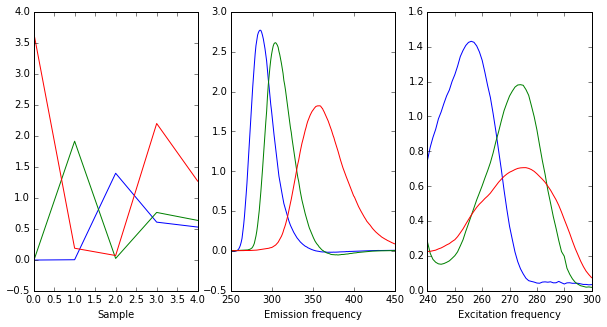

In [11]:
# Plot the factors
plt.rcParams['figure.figsize']=(10,5)
ix=[0,1,2]
plt.subplot(1,3,1)
sgn=np.sign(np.median(U,axis=0))
plt.plot(U*sgn)
plt.xlabel('Sample')

plt.subplot(1,3,2)
sgn=np.sign(np.median(V[:,ix],axis=0))
plt.plot(amino['EmAx'].T, V[:,ix]*sgn)
plt.xlabel('Emission frequency')

plt.subplot(1,3,3)
sgn=np.sign(np.median(W[:,ix],axis=0))
plt.plot(amino['ExAx'].T, W[:,ix]*sgn)
plt.xlabel('Excitation frequency')
